In [1]:
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.util
import matplotlib.pyplot as plt
import pprint
import re
import gensim
import gensim.corpora as corpora
import os
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.util
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import pprint
import re
import gensim
import gensim.corpora as corpora
import os
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import string
import math
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [2]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [3]:
df = pd.read_csv('../../amazon_reviews_us_Grocery_v1_00_sentiment.csv').sample(50000)

df = df.drop(["marketplace", "customer_id", "product_parent", "product_category", "review_date"], axis=1)

df = df[~df['review_body'].isnull()]

df['review_body'] = df['review_headline'] + '. ' + df['review_body']

df["health_hazard"] = np.nan

df = df.set_index("review_id")

In [4]:
neg_reviews = df.query("star_rating < 4", engine="python")

In [5]:
stop_words = stopwords.words('english')
stop_words.extend(['br'])
translator=str.maketrans('','',string.punctuation)

neg_reviews["tokened_review"] = np.nan
for index, row in neg_reviews.iterrows():
    text = row["review_body"].lower()
    text = text.translate(translator)
    text = word_tokenize(text)
    new_text = []
    for token in text:
        token = stemmer.stem(token)
        if token not in stop_words:
            new_text.append(token)
    neg_reviews.loc[index, "tokened_review"] = ' '.join(new_text)
neg_reviews["tokened_review"][0]

<ipython-input-5-5557a774945a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_reviews["tokened_review"] = np.nan
C:\Users\MattW\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


'save money worst flavor ever receiv onli receiv 4 5 differ flavor flavor undesir say least noth would ever imagin would receiv pictur depict much differ flavor receiv tri return wa advis thi nonreturn item'

In [6]:
hazardous_words=["rotten", "mouldy", "moldy", "mold", "mould", "sick", "dangerous", "diarrhea", "poisoning", "stale"]
for word in hazardous_words:
    neg_reviews.loc[[word in tokened_review for tokened_review in neg_reviews["tokened_review"]], "health_hazard"] = 1
    

In [7]:
num_labeled = len(neg_reviews.query("health_hazard == 1", engine="python"))
num_labeled

460

In [8]:
non_hazardous = neg_reviews.query("health_hazard != 1 and polarity < 0", engine="python").sample(num_labeled)
for i in list(non_hazardous.index):
    neg_reviews.loc[i, "health_hazard"] = 0

C:\Users\MattW\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [9]:
labeled = neg_reviews.query("health_hazard == 0 or health_hazard == 1", engine="python")
reviews = labeled.loc[:, 'tokened_review'].values
y = labeled.loc[:, 'health_hazard'].values

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = TfidfVectorizer(max_features=200)
X = matrix.fit_transform(reviews).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.22857428,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.29191287,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8608695652173913


In [13]:
trial = neg_reviews.sample(100)

In [14]:
matrix.get_feature_names()

['ad',
 'almost',
 'also',
 'amazon',
 'ani',
 'anoth',
 'arriv',
 'aw',
 'away',
 'back',
 'bad',
 'bag',
 'bar',
 'batch',
 'bean',
 'becaus',
 'befor',
 'best',
 'better',
 'big',
 'bit',
 'bitter',
 'bottl',
 'bought',
 'box',
 'brand',
 'brew',
 'broken',
 'buy',
 'call',
 'came',
 'candi',
 'cant',
 'chip',
 'chocol',
 'coffe',
 'come',
 'compani',
 'complet',
 'contain',
 'cooki',
 'could',
 'cup',
 'date',
 'day',
 'didnt',
 'differ',
 'disappoint',
 'doe',
 'doesnt',
 'dont',
 'dri',
 'drink',
 'eat',
 'end',
 'even',
 'ever',
 'expect',
 'expens',
 'expir',
 'extrem',
 'feel',
 'find',
 'first',
 'flavor',
 'food',
 'found',
 'fresh',
 'gave',
 'get',
 'gift',
 'give',
 'go',
 'good',
 'got',
 'great',
 'green',
 'ha',
 'hard',
 'high',
 'hope',
 'horribl',
 'hot',
 'howev',
 'im',
 'ingredi',
 'item',
 'ive',
 'jar',
 'kcup',
 'know',
 'label',
 'last',
 'less',
 'like',
 'littl',
 'local',
 'long',
 'look',
 'lot',
 'love',
 'made',
 'make',
 'mani',
 'mayb',
 'might',
 'mi

In [15]:
trial = neg_reviews
trial_x = trial.loc[:,"tokened_review"].values
trial_X = matrix.fit_transform(trial_x).toarray()
trial_y = classifier.predict(trial_X)
trial_y

array([1., 0., 0., ..., 0., 0., 1.])

In [16]:
neg_reviews["health_hazard"] = trial_y

<ipython-input-16-56d181f868ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_reviews["health_hazard"] = trial_y


In [17]:
dangerous = neg_reviews.query("health_hazard == 1", engine="python")
dangerous

product_id                                      product_title  \
review_id                                                                       
RHA8HP03F1Y8R   B00LLILH98  Crazy Cups Flavored Coffee, Variety Pack Sampl...   
R16KACNW2HGALB  B0011DL6C6  Yogourmet Casei Bifidus Acidophilus Probiotic ...   
R6T9R8R6RDQH6   B00AQFGL3O                          Nutiva Organic Chia Seeds   
R1LTX0ZYY3NLPH  B00CJ86RS0                                Ethical Bean Coffee   
R2APF39XTCXYK5  B003LJAFY8  Nuttzo Organic Seven Nut & Seed Crunchy Butter...   
...                    ...                                                ...   
R27PVZH2QY8CZ2  B002GWMD2I  Coffee Bean Direct Dark Whole Bean Coffee, 5 P...   
R1RS62XMVAVKIO  B0015P54R8                     Healthworks Maca Powder Parent   
R8QY9WAWA47GQ   B008K1J7VY                     Unsulfured Blackstrap Molasses   
R2BGK7NNKW5L06  B000QV0MA6             Carousel SugarFree Gumballs 16 Oz. Bag   
R362XIKVS38L0R  B00MQ6831Y  Lavazza Perfetto Keurig K-Cup Portion Pack, 22...   

                star_rating  helpful_votes  total_votes vine  \
review_id                                                      
RHA8HP03F1Y8R             1              1            3    N   
R16KACNW2HGALB            2              0            0    N   
R6T9R8R6RDQH6             3              0            0    N   
R1LTX0ZYY3NLPH            1             23           26    N   
R2APF39XTCXYK5            2              1            3    N   
...                     ...            ...          ...  ...   
R27PVZH2QY8CZ2            2              5            6    N   
R1RS62XMVAVKIO            3              1            1    N   
R8QY9WAWA47GQ             3              1            1    N   
R2BGK7NNKW5L06            1              4            4    N   
R362XIKVS38L0R            2              0            2    N   

               verified_purchase  \
review_id                          
RHA8HP03F1Y8R                  Y   
R16KACNW2HGALB                 Y   
R6T9R8R6RDQH6                  Y   
R1LTX0ZYY3NLPH                 Y   
R2APF39XTCXYK5                 N   
...                          ...   
R27PVZH2QY8CZ2                 Y   
R1RS62XMVAVKIO                 Y   
R8QY9WAWA47GQ                  Y   
R2BGK7NNKW5L06                 Y   
R362XIKVS38L0R                 N   

                                                  review_headline  \
review_id                                                           
RHA8HP03F1Y8R   Save your money - these were the worst flavors...   
R16KACNW2HGALB                            Not suitable for vegans   
R6T9R8R6RDQH6                                         Three Stars   
R1LTX0ZYY3NLPH                                           One Star   
R2APF39XTCXYK5                                               yuk!   
...                                                           ...   
R27PVZH2QY8CZ2                                       Not the Best   
R1RS62XMVAVKIO  Has an odd smell and taste alone but tastes go...   
R8QY9WAWA47GQ                          Fine product but expensive   
R2BGK7NNKW5L06                            Sugar/Taste free balls!   
R362XIKVS38L0R                            Lavazza Perfetto K-Cups   

                                                      review_body  polarity  \
review_id                                                                     
RHA8HP03F1Y8R   Save your money - these were the worst flavors... -0.025000   
R16KACNW2HGALB  Not suitable for vegans. Ordered this to make ... -0.094444   
R6T9R8R6RDQH6                                  Three Stars. Good!  0.875000   
R1LTX0ZYY3NLPH  One Star. It is stated to be good for espresso...  0.700000   
R2APF39XTCXYK5  yuk!. Surprised by the high ratings for this s... -0.003194   
...                                                           ...       ...   
R27PVZH2QY8CZ2  Not the Best. Of all the coffee beans I have g... -0.081964   
R1RS62XMVAVKIO  Has an odd smell and taste alone bu

In [18]:
#data['review_body'] = data['review_body'].map(lambda x: re.sub('[,\.!?]', '', x))
#data['review_body'] = data['review_body'].map(lambda x: x.lower())
data = dangerous["review_body"]
data

review_id
RHA8HP03F1Y8R     Save your money - these were the worst flavors...
R16KACNW2HGALB    Not suitable for vegans. Ordered this to make ...
R6T9R8R6RDQH6                                    Three Stars. Good!
R1LTX0ZYY3NLPH    One Star. It is stated to be good for espresso...
R2APF39XTCXYK5    yuk!. Surprised by the high ratings for this s...
                                        ...                        
R27PVZH2QY8CZ2    Not the Best. Of all the coffee beans I have g...
R1RS62XMVAVKIO    Has an odd smell and taste alone but tastes go...
R8QY9WAWA47GQ     Fine product but expensive. This is fine quali...
R2BGK7NNKW5L06    Sugar/Taste free balls!. I'm a big sucker for ...
R362XIKVS38L0R    Lavazza Perfetto K-Cups. I received a Pack of ...
Name: review_body, Length: 1972, dtype: object

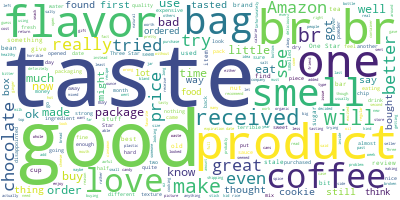

In [19]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [20]:
stop_words = stopwords.words('english')
stop_words.extend(['br','[', ',', '\\', '.', '!', '?', ']', '<', '>', '$', '£', '/', '*', '(', ')', '%', '^', '&', '-', '_', '=', '+', '|', '#','~',';',':','...',"''",'//','\\\\',"n't","'ve","'m","'s"])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(nltk.word_tokenize(str(sentence)))
        
def remove_stopwords(texts):
    return [[(te,ta) for (te,ta) in doc if (te.replace("_NEG","") not in stop_words)] for doc in texts]

data_filtered = data
data_words = list(sent_to_words(data_filtered))
# remove stop words
#data_words = remove_stopwords(data_words)
pprint.pprint(data_words[:5])
#np.array(data_words[0], dtype=object).shape

[['Save',
  'your',
  'money',
  '-',
  'these',
  'were',
  'the',
  'worst',
  'flavors',
  'I',
  'have',
  'ever',
  'received',
  '.',
  'I',
  'only',
  'received',
  '4',
  'or',
  '5',
  'different',
  'flavors',
  'and',
  'the',
  'flavors',
  'were',
  'undesirable',
  'to',
  'say',
  'the',
  'least',
  '.',
  'Nothing',
  'I',
  'would',
  'have',
  'ever',
  'imagined',
  'I',
  'would',
  'receive',
  '.',
  'The',
  'picture',
  'depicted',
  'much',
  'different',
  'flavors',
  'then',
  'what',
  'I',
  'received',
  '.',
  'I',
  'tried',
  'to',
  'return',
  'them',
  'but',
  'was',
  'advised',
  'this',
  'is',
  'a',
  'nonreturnable',
  'item',
  '.'],
 ['Not',
  'suitable',
  'for',
  'vegans',
  '.',
  'Ordered',
  'this',
  'to',
  'make',
  'vegan',
  'yoghurt',
  'at',
  'home',
  'out',
  'of',
  'coconut',
  'milk',
  '.',
  'How',
  'bummed',
  'was',
  'I',
  'to',
  'receive',
  'this',
  'and',
  'then',
  'see',
  '&',
  '#',
  '34',
  ';',
  'sk

In [21]:
data_words = [[word.lower() for word in data_point] for data_point in data_words]
data_words

[['save',
  'your',
  'money',
  '-',
  'these',
  'were',
  'the',
  'worst',
  'flavors',
  'i',
  'have',
  'ever',
  'received',
  '.',
  'i',
  'only',
  'received',
  '4',
  'or',
  '5',
  'different',
  'flavors',
  'and',
  'the',
  'flavors',
  'were',
  'undesirable',
  'to',
  'say',
  'the',
  'least',
  '.',
  'nothing',
  'i',
  'would',
  'have',
  'ever',
  'imagined',
  'i',
  'would',
  'receive',
  '.',
  'the',
  'picture',
  'depicted',
  'much',
  'different',
  'flavors',
  'then',
  'what',
  'i',
  'received',
  '.',
  'i',
  'tried',
  'to',
  'return',
  'them',
  'but',
  'was',
  'advised',
  'this',
  'is',
  'a',
  'nonreturnable',
  'item',
  '.'],
 ['not',
  'suitable',
  'for',
  'vegans',
  '.',
  'ordered',
  'this',
  'to',
  'make',
  'vegan',
  'yoghurt',
  'at',
  'home',
  'out',
  'of',
  'coconut',
  'milk',
  '.',
  'how',
  'bummed',
  'was',
  'i',
  'to',
  'receive',
  'this',
  'and',
  'then',
  'see',
  '&',
  '#',
  '34',
  ';',
  'sk

In [22]:
import nltk.sentiment.util
tokens = list(map(nltk.word_tokenize, data))
negated_tokens = list(map(nltk.sentiment.util.mark_negation, tokens))
data = negated_tokens

In [23]:
#print(data_words)
def tag(texts):
    #tokens = list(map(nltk.word_tokenize, texts))
    tagged = [nltk.pos_tag(text, tagset='universal') for text in texts]
    negated_tokens = list(map(nltk.sentiment.util.mark_negation, texts))
    negated_tagged = [[(negated_tokens[i][j], tagged[i][j][1]) for j in range(len(texts[i]))] for i in range(len(texts))]
    return negated_tagged
negated_tagged = tag(data_words)
negated_tagged

[[('save', 'VERB'),
  ('your', 'PRON'),
  ('money', 'NOUN'),
  ('-', '.'),
  ('these', 'DET'),
  ('were', 'VERB'),
  ('the', 'DET'),
  ('worst', 'ADJ'),
  ('flavors', 'NOUN'),
  ('i', 'VERB'),
  ('have', 'VERB'),
  ('ever', 'ADV'),
  ('received', 'VERB'),
  ('.', '.'),
  ('i', 'NOUN'),
  ('only', 'ADV'),
  ('received', 'VERB'),
  ('4', 'NUM'),
  ('or', 'CONJ'),
  ('5', 'NUM'),
  ('different', 'ADJ'),
  ('flavors', 'NOUN'),
  ('and', 'CONJ'),
  ('the', 'DET'),
  ('flavors', 'NOUN'),
  ('were', 'VERB'),
  ('undesirable', 'ADJ'),
  ('to', 'PRT'),
  ('say', 'VERB'),
  ('the', 'DET'),
  ('least', 'ADJ'),
  ('.', '.'),
  ('nothing', 'NOUN'),
  ('i_NEG', 'NOUN'),
  ('would_NEG', 'VERB'),
  ('have_NEG', 'VERB'),
  ('ever_NEG', 'ADV'),
  ('imagined_NEG', 'VERB'),
  ('i_NEG', 'NOUN'),
  ('would_NEG', 'VERB'),
  ('receive_NEG', 'VERB'),
  ('.', '.'),
  ('the', 'DET'),
  ('picture', 'NOUN'),
  ('depicted', 'VERB'),
  ('much', 'ADV'),
  ('different', 'ADJ'),
  ('flavors', 'NOUN'),
  ('then', 'ADV')

In [24]:
data_words = remove_stopwords(negated_tagged)
data_words

[[('save', 'VERB'),
  ('money', 'NOUN'),
  ('worst', 'ADJ'),
  ('flavors', 'NOUN'),
  ('ever', 'ADV'),
  ('received', 'VERB'),
  ('received', 'VERB'),
  ('4', 'NUM'),
  ('5', 'NUM'),
  ('different', 'ADJ'),
  ('flavors', 'NOUN'),
  ('flavors', 'NOUN'),
  ('undesirable', 'ADJ'),
  ('say', 'VERB'),
  ('least', 'ADJ'),
  ('nothing', 'NOUN'),
  ('would_NEG', 'VERB'),
  ('ever_NEG', 'ADV'),
  ('imagined_NEG', 'VERB'),
  ('would_NEG', 'VERB'),
  ('receive_NEG', 'VERB'),
  ('picture', 'NOUN'),
  ('depicted', 'VERB'),
  ('much', 'ADV'),
  ('different', 'ADJ'),
  ('flavors', 'NOUN'),
  ('received', 'VERB'),
  ('tried', 'VERB'),
  ('return', 'VERB'),
  ('advised', 'VERB'),
  ('nonreturnable', 'ADJ'),
  ('item', 'NOUN')],
 [('suitable_NEG', 'ADJ'),
  ('vegans_NEG', 'NOUN'),
  ('ordered', 'VERB'),
  ('make', 'VERB'),
  ('vegan', 'ADJ'),
  ('yoghurt', 'NOUN'),
  ('home', 'NOUN'),
  ('coconut', 'NOUN'),
  ('milk', 'NOUN'),
  ('bummed', 'VERB'),
  ('receive', 'VERB'),
  ('see', 'VERB'),
  ('34', 'NUM

In [25]:
#gets adjectives

def get_adjectives(tagged):
    review_a = [word for (word, tag) in tagged if (tag == 'ADJ' or tag == 'ADV' or tag == 'NOUN' or tag == 'VERB')]
    return review_a

data_words = list(map(lambda x: get_adjectives(x), data_words))

'''
for i in range(len(data_words)):
    data_words[i] = [word for (word,tag) in data_words[i]]
'''
data_words


[['save',
  'money',
  'worst',
  'flavors',
  'ever',
  'received',
  'received',
  'different',
  'flavors',
  'flavors',
  'undesirable',
  'say',
  'least',
  'nothing',
  'would_NEG',
  'ever_NEG',
  'imagined_NEG',
  'would_NEG',
  'receive_NEG',
  'picture',
  'depicted',
  'much',
  'different',
  'flavors',
  'received',
  'tried',
  'return',
  'advised',
  'nonreturnable',
  'item'],
 ['suitable_NEG',
  'vegans_NEG',
  'ordered',
  'make',
  'vegan',
  'yoghurt',
  'home',
  'coconut',
  'milk',
  'bummed',
  'receive',
  'see',
  'skim',
  'milk',
  'powder',
  'listed',
  'ingredient',
  'bad',
  'reading_NEG',
  'whole_NEG',
  'description_NEG',
  'might_NEG',
  'make_NEG',
  'clearer_NEG',
  'front_NEG',
  'good_NEG',
  'plant-based_NEG',
  'people_NEG'],
 ['stars', 'good'],
 ['star', 'stated', 'good', 'espresso', 'ground', 'drip', '..'],
 ['yuk',
  'surprised',
  'high',
  'ratings',
  'stuff',
  'tastes',
  'big',
  'old',
  'mess',
  'good_NEG',
  'way_NEG',
  'even_N

In [26]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
pprint.pprint(corpus[:5])

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 4),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 3),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 2)],
 [(23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1)],
 [(50, 1), (51, 1)],
 [(50, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)],
 [(2, 1),
  (29, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1)

In [35]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       minimum_probability=0.1,
                                       workers=3,
                                       passes=2)
# Print the Keyword in the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.008*"good_NEG" + 0.007*"good" + 0.006*"flavor" + 0.006*"taste" + '
  '0.005*"would" + 0.005*"love" + 0.004*"product" + 0.004*"stars" + '
  '0.003*"taste_NEG" + 0.003*"chocolate"'),
 (1,
  '0.008*"would" + 0.007*"received" + 0.006*"product" + 0.006*"good" + '
  '0.005*"really" + 0.005*"flavor" + 0.004*"price" + 0.004*"coffee" + '
  '0.004*"amazon" + 0.003*"bags"'),
 (2,
  '0.014*"good" + 0.011*"product" + 0.007*"flavor" + 0.006*"good_NEG" + '
  '0.006*"would" + 0.005*"chocolate" + 0.005*"ok" + 0.005*".." + 0.005*"taste" '
  '+ 0.004*"bag"'),
 (3,
  '0.008*"taste" + 0.006*"good_NEG" + 0.005*"product" + 0.005*"coffee" + '
  '0.005*"could" + 0.004*"tea" + 0.004*"star" + 0.004*"good" + 0.004*"flavor" '
  '+ 0.004*"better"'),
 (4,
  '0.006*"coffee" + 0.005*"taste" + 0.005*"would" + 0.005*"good" + '
  '0.005*"flavor" + 0.004*"love" + 0.004*"bag" + 0.004*"even" + 0.004*"tastes" '
  '+ 0.004*"smell"'),
 (5,
  '0.005*"good" + 0.004*"ginger" + 0.003*"love" + 0.003*"taste" + '
  '0.003*"

In [36]:
pprint.pprint(lda_model.print_topics(num_topics=100))

[(0,
  '0.008*"good_NEG" + 0.007*"good" + 0.006*"flavor" + 0.006*"taste" + '
  '0.005*"would" + 0.005*"love" + 0.004*"product" + 0.004*"stars" + '
  '0.003*"taste_NEG" + 0.003*"chocolate"'),
 (1,
  '0.008*"would" + 0.007*"received" + 0.006*"product" + 0.006*"good" + '
  '0.005*"really" + 0.005*"flavor" + 0.004*"price" + 0.004*"coffee" + '
  '0.004*"amazon" + 0.003*"bags"'),
 (2,
  '0.014*"good" + 0.011*"product" + 0.007*"flavor" + 0.006*"good_NEG" + '
  '0.006*"would" + 0.005*"chocolate" + 0.005*"ok" + 0.005*".." + 0.005*"taste" '
  '+ 0.004*"bag"'),
 (3,
  '0.008*"taste" + 0.006*"good_NEG" + 0.005*"product" + 0.005*"coffee" + '
  '0.005*"could" + 0.004*"tea" + 0.004*"star" + 0.004*"good" + 0.004*"flavor" '
  '+ 0.004*"better"'),
 (4,
  '0.006*"coffee" + 0.005*"taste" + 0.005*"would" + 0.005*"good" + '
  '0.005*"flavor" + 0.004*"love" + 0.004*"bag" + 0.004*"even" + 0.004*"tastes" '
  '+ 0.004*"smell"'),
 (5,
  '0.005*"good" + 0.004*"ginger" + 0.003*"love" + 0.003*"taste" + '
  '0.003*"

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
from itertools import chain
lda_corpus = lda_model[corpus]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
data_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(data_vis)

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(threshold)

In [43]:
'''cluster1 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[0][1] > threshold]
print(1)
cluster2 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[1][1] > threshold]
print(2)
cluster3 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[2][1] > threshold]
print(3)
'''

1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list index out of range

In [ ]:
'''print(cluster1[:100], "\n \n")
print(cluster2[:100], "\n \n")
print(cluster3[:100], "\n")
'''